### Codio Activity 12.4: Accuracy, Precision, and Recall

**Expected Time: 60 Minutes**

**Total Points: 55**

This activity focuses on differentiating between three classification metrics -- accuracy, precision, and recall.  Depending on the situation you may have different perspectives.  In this assignment, you will use the scikit-learn metrics to evaluate and compare performance metrics.  In the next assignment, you will use confusion matrices to visually intuit these ideas.  

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.datasets import load_breast_cancer
from sklearn import set_config

set_config(display="diagram")

### The Data

Your dataset for this problem will be a built in dataset from scikitlearn containing measurements determined from images of breast cancer tumors and the label of malignant or benign.  There are 30 features and the target feature.  The data is loaded and split below.  
<p>Target = 0 means the cancer is malignant, Target = 1 means the cancer is benign

In [2]:
cancer = load_breast_cancer(as_frame=True)

In [3]:
df = cancer.frame

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df['target'] = np.where(df['target'] == 0, 'malignant', 'benign')

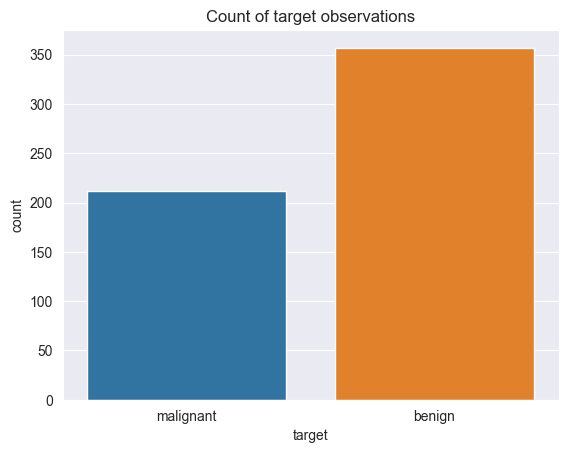

In [6]:
sns.countplot(data=df, x = 'target')
plt.title('Count of target observations');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, random_state = 42, stratify = df.target)

[Back to top](#-Index)

### Problem 1

#### Setting a Baseline

**5 Points**

It is always important to get in the habit of checking the baseline score for a classification model.  Here, when splitting the data the `stratify` argument was used so that both the train and test set would have a similar proportion of classes.  This can be seen below.  Using this data, what is a baseline score for the model that predicts the majority class for all data points?  Enter your answer as a string to `baseline` below.

```
a) 37% accuracy
b) 63% accuracy
c) 50% accuracy
d) 100% accuracy
```

In [8]:
y_test.value_counts(normalize = True)


benign       0.629371
malignant    0.370629
Name: target, dtype: float64

In [9]:
y_train.value_counts(normalize = True)

benign       0.626761
malignant    0.373239
Name: target, dtype: float64

In [10]:
### GRADED

baseline = ''

### BEGIN SOLUTION
baseline = 'b'
### END SOLUTION

# Answer check
print(baseline)

b


In [11]:
### BEGIN HIDDEN TESTS
baseline_ = 'b'
#
#
#
assert type(baseline) == type(baseline_)
assert baseline == baseline_
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Pipeline for scaling and KNN

**10 Points**

To begin, create a pipeline `knn_pipe` with named steps `scale` and `knn` that uses the `StandardScaler` followed by the `KNeighborsClassifier` with `n_neighbors = 10`.  Fit this on the training data. 

In [12]:
### GRADED

knn_pipe = ''

### BEGIN SOLUTION
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe.fit(X_train, y_train)
### END SOLUTION

# Answer check
knn_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [13]:
### BEGIN HIDDEN TESTS
knn_pipe_ = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe_.fit(X_train, y_train)
#
#
#
assert list(knn_pipe_.named_steps.keys()) == list(knn_pipe.named_steps.keys()), 'Make sure you have steps named scale and knn'
assert knn_pipe_.named_steps['knn'].n_neighbors == knn_pipe.named_steps['knn'].n_neighbors
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Evaluating your classifier

**10 Points**

Three scoring methods have been imported from scikit-learn that are used by comparing predictions to actual values.  Choose which method from `precision_score`, `recall_score`, and `accuracy_score` indicate fewer false positives (where a higher score means FEWER false positives). Use this scoring method to score `knn_pipe` on the test data as `min_fp` below.

**NOTE**: You will need to pass `pos_label = 'malignant'` here to make the scorer aware of which label is the positive class.

In [14]:
### GRADED

min_fp = ''

### BEGIN SOLUTION
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe.fit(X_train, y_train)
min_fp = precision_score(y_test, knn_pipe.predict(X_test), pos_label = 'malignant')
### END SOLUTION

# Answer check
print(min_fp)

0.9795918367346939


In [15]:
### BEGIN HIDDEN TESTS
knn_pipe_ = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe_.fit(X_train, y_train)
min_fp_ = precision_score(y_test, knn_pipe_.predict(X_test), pos_label = 'malignant')
#
#
#
assert min_fp_ == min_fp, 'Check the formulas from video for denominator containing false positive.'
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Right kind of mistakes

**10 Points**

In this situation, which mistake is more detrimental to the patient if we attempt to use our algorithm to classify tumors as malignant or benign.  Would you rather avoid false positives or false negatives?  What metric does this mean we should use here? Enter your answer as a string to `best_metric` below -- `precision`, `recall`, or `accuracy`?

In [16]:
### GRADED

best_metric = ''

### BEGIN SOLUTION
best_metric = 'recall'
### END SOLUTION

# Answer check
print(best_metric)

recall


In [17]:
### BEGIN HIDDEN TESTS
best_metric_ = 'recall'
#
#
#
assert best_metric == best_metric_, 'False negatives would perhaps be the worst here.'
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### Improving a model based on specific metric

**10 Points**

Before, when using the `GridSearchCV` the best model has been selected using the default scoring method of the estimator.  You can change this behavior by passing an appropriate metric to the `scoring` argument. 

Before doing so, to make things easier you should set the target features to numeric datatypes.  Use the given dictionary to map the numeric values to `y_train` and `y_test` as `y_train_numeric` and `y_test_numeric` accordingly.  Then, implement a grid search called `recall_grid` for odd numbers of neighbors from 1 to 21 where `recall` is the scoring metric used.

In [18]:
target_map = {'malignant': 1, 'benign': 0}

In [27]:
### GRADED

y_train_numeric = ''
y_test_numeric = ''
recall_grid = ''


### BEGIN SOLUTION
y_train_numeric = y_train.map(target_map)
y_test_numeric = y_test.map(target_map)
recall_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1, 23, 2)}, scoring = 'recall')
recall_grid.fit(X_train, y_train_numeric)
best_score = recall_grid.score(X_test, y_test_numeric)
### END SOLUTION

# Answer check
print(f'The best recall score is: {best_score: .2f}')

The best recall score is:  0.89


In [28]:
### BEGIN HIDDEN TESTS
y_train_numeric_ = y_train.map(target_map)
y_test_numeric_ = y_test.map(target_map)
recall_grid_ = GridSearchCV(knn_pipe_, param_grid = {'knn__n_neighbors': range(1, 23, 2)}, scoring = 'recall')
recall_grid_.fit(X_train, y_train_numeric_)
best_score_ = recall_grid_.score(X_test, y_test_numeric_)
#
#
#
#np.testing.assert_array_equal(y_train_numeric, y_train_numeric_)
assert best_score_ == best_score, 'Make sure you use scoring = "recall".'
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 6

#### Verifying the score

**10 Points**

Use your `recall_grid` to make predictions on the test data and assign to preds.  Use these predictions to count the number of false negatives and true positives.  Assign these as integers to `fp` and `tp` respectively below.  This should show that the grid search scoring method has been changed to recall.  

In [29]:
### GRADED
recall_preds = ''
fp = ''
tp = ''


### BEGIN SOLUTION
recall_preds = recall_grid.predict(X_test)
fn = 0
tp = 0
for i,j in zip(recall_preds, y_test_numeric):
    if i == 0 and j == 1:
        fn += 1
    if i == 1 and j == 1:
        tp += 1
### END SOLUTION

### ANSWER CHECK
print(f'Recall by hand is: {tp/(tp + fn): .2f}')

Recall by hand is:  0.89


In [30]:
### BEGIN HIDDEN TESTS
recall_preds_ = recall_grid_.predict(X_test)
fn_ = 0
tp_ = 0
for i,j in zip(recall_preds_, y_test_numeric_):
    if i == 0 and j == 1:
        fn_ += 1
    if i == 1 and j == 1:
        tp_ += 1
#
#
#
assert fn == fn_ 
assert tp == tp_
### END HIDDEN TESTS

In other situations, a different metric may make sense.  Here, a specific kind of error -- labeling a cancerous tumor as not so -- is something we certainly want to avoid.  In the next activity, you will continue to consider these issues using confusion matrices to unpack the errors and how changing parameters of the estimator effects this.